In [24]:
import pyodbc
import pandas as pd

# Define your connection string
connection_string = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=DESKTOP-VBOJIT8\\SQLEXPRESS01;"
    "DATABASE=Customer Data Management;"
    "Trusted_Connection=yes;"
)

# Create a connection
conn = pyodbc.connect(connection_string)

# Define your query
query = "SELECT TOP 5 * FROM customers"

# Execute the query and load the data into a DataFrame
customers_df = pd.read_sql(query, conn)

# Close the connection
conn.close()

# Print the DataFrame
print(customers_df)


   customer_id    customer_name  age  gender
0            1    Dominic Cline   67  Female
1            2      Crystal Day   42  Female
2            3     Joseph Perez   31    Male
3            4       Wyatt Love   37    Male
4            5  Shannon Hoffman   24  Female


C:\Users\DEll\AppData\Local\Temp\ipykernel_15092\2993459995.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  customers_df = pd.read_sql(query, conn)


In [25]:
# Check for missing values
print(customers_df.isnull().sum())

customer_id      0
customer_name    0
age              0
gender           0
dtype: int64


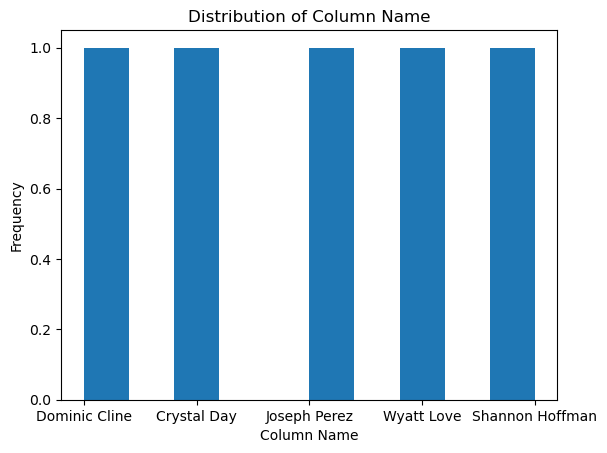

In [26]:
# Basic statistical analysis
summary = customers_df.describe()

# Example of visualizing data using matplotlib or seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Histogram of a specific column
plt.hist(customers_df['customer_name'])
plt.title('Distribution of Column Name')
plt.xlabel('Column Name')
plt.ylabel('Frequency')
plt.show()

In [27]:
# Export the cleaned DataFrame to a new CSV file
customers_df.to_csv('cleaned_customers_data.csv', index=False)

# Using the to_sql method (requires SQLAlchemy)
from sqlalchemy import create_engine

# Create a SQLAlchemy engine
engine = create_engine('mssql+pyodbc://DESKTOP-VBOJIT8\
                        SQLEXPRESS01/Customer Data Management?driver=ODBC+Driver+17+for+SQL+Server')

# Save the DataFrame to a SQL table
customers_df.to_sql('cleaned_customers', engine, index=False, if_exists='replace')

5